In [27]:
#importing liberaries
import pandas as pd
import talib
import pynance as pn
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import numpy as np


In [6]:
# Load and Prepare the Data
stock_data= pd.read_csv('../data/all_stock_data1.csv')  # Assuming you have a CSV file named 'stock_data.csv'
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2013-03-05,33.310001,33.310001,33.310001,33.310001,30.201914,300.0,AADR
1,2013-03-06,33.290001,33.290001,33.220001,33.220001,30.120306,300.0,AADR
2,2013-03-07,33.410000,33.410000,32.970001,33.130001,30.038700,1500.0,AADR
3,2013-03-08,33.009998,33.250000,33.009998,33.250000,30.147512,1300.0,AADR
4,2013-03-11,33.330002,33.360001,32.959999,33.060001,29.975235,1800.0,AADR


In [7]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2020-12-31'

# Get stock data using PyNance
stock_data = pn.data.get(stock_symbol, start_date, end_date)


In [8]:
print(stock_data)

                Open      High       Low     Close        Volume
Date                                                            
2020-12-31  132.4860  133.1340  130.1530  131.1200  1.003064e+08
2020-12-30  133.9320  134.3800  131.8180  132.1370  9.760997e+07
2020-12-29  136.4140  137.1420  132.7450  133.2640  1.225004e+08
2020-12-28  132.3960  135.7260  131.9270  135.0780  1.259806e+08
2020-12-24  129.7540  131.8780  129.5350  130.4030  5.558946e+07
...              ...       ...       ...       ...           ...
2020-01-08   72.7810   74.5626   72.7790   74.2575  1.351095e+08
2020-01-07   73.4350   73.6972   72.8607   73.0831  1.138238e+08
2020-01-06   71.9515   73.4649   71.7023   73.4250  1.210384e+08
2020-01-03   72.7790   73.6185   72.6185   72.8488  1.495753e+08
2020-01-02   72.5537   73.6225   72.2955   73.5616  1.384613e+08

[253 rows x 5 columns]


In [18]:
# Calculate moving averages (50-day and 200-day)
stock_data['MA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['MA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)

# Calculate relative strength index (RSI)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

# Calculate moving average convergence divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
stock_data['MACD'] = macd
stock_data['MACD_signal'] = macdsignal

In [19]:
# Plotting the data
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

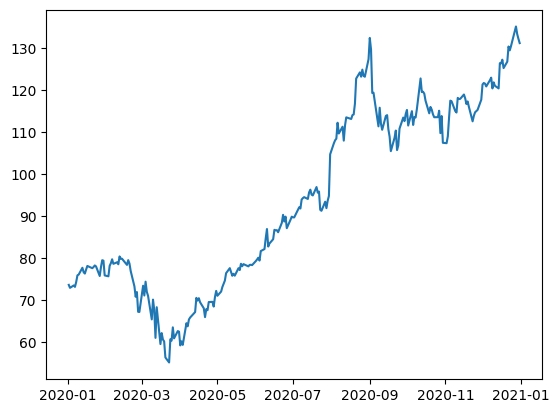

In [20]:
# Plot AAPL closing price
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')

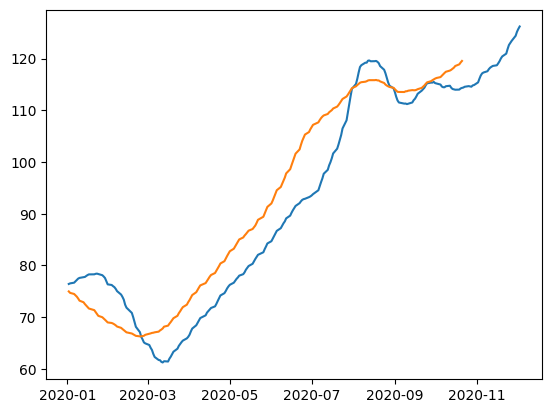

In [21]:
# Plot 20-day and 50-day moving averages
plt.plot(stock_data.index, stock_data['MA_20'], label='20-day MA')
plt.plot(stock_data.index, stock_data['MA_50'], label='50-day MA')

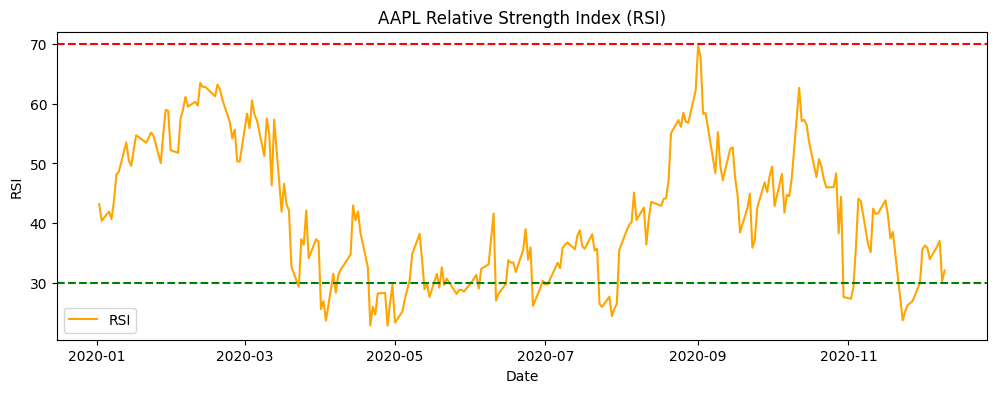

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('AAPL Relative Strength Index (RSI)')
plt.legend()
plt.show()

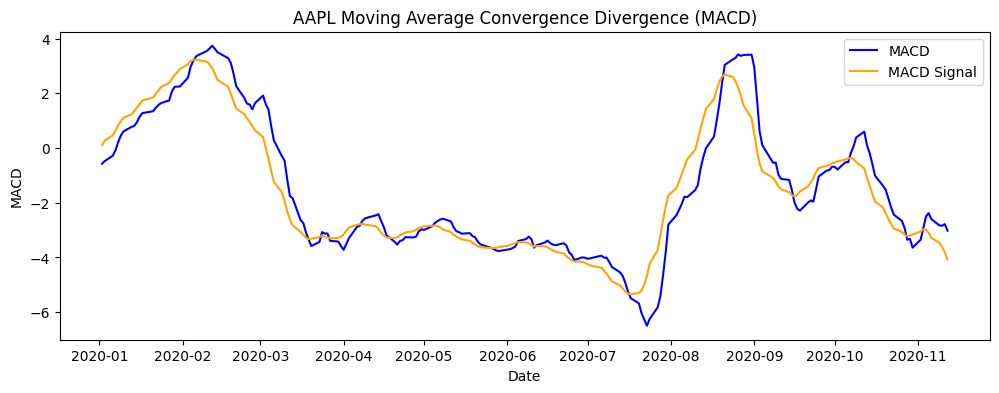

In [23]:
# Plot MACD
plt.figure(figsize=(12, 4))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data.index, stock_data['MACD_signal'], label='MACD Signal', color='orange')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('AAPL Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

In [28]:
# Calculate financial metrics

# Calculate daily returns
daily_returns = stock_data['Close'].pct_change()

# Calculate annual return
annual_return = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Calculate volatility (annualized standard deviation)
volatility = daily_returns.std() * np.sqrt(252)  # Assuming 252 trading days in a year

# Print the calculated metrics
print("Annual Return:", annual_return)
print("Volatility:", volatility)

Annual Return: -0.4685114271007067
Volatility: 0.46891630266019074
